In [0]:
import tensorflow as tf

In [0]:
a=tf.Variable(1,name="a")
b=tf.Variable(2,name="b")
f=a+b
init=tf.global_variables_initializer()
with tf.Session() as s:
  init.run()
  print(f.eval())


3


In [0]:
from tensorflow.examples.tutorials.mnist import input_data

sess=tf.InteractiveSession()
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


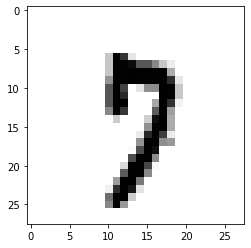

In [0]:
import matplotlib.pyplot as plt 
def display_sample(num):
  print(mnist.train.labels[num])
  
  label=mnist.train.labels[num].argmax(axis=0)
  
  image=mnist.train.images[num].reshape([28,28])
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()
display_sample(25)

In [0]:
input_images=tf.placeholder(tf.float32, shape=[None, 784])
target_labels=tf.placeholder(tf.float32, shape=[None,10])

In [0]:
# TO STORE WEIGHTS AND LATER TWEAK THEM IN THIS  MATRIX OR TENSOR
hidden_nodes=512

input_weights=tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_biases=tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights=tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_bias=tf.Variable(tf.zeros([10]))

In [0]:
#INITIAL LAYER BANANA DEFINE KARNA LAYER KO
input_layer=tf.matmul(input_images,input_weights)
hidden_layer=tf.nn.relu(input_layer+input_biases)
digit_weights=tf.matmul(hidden_layer,hidden_weights)+hidden_bias

In [0]:
#COST FUNCTION
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=digit_weights,labels=target_labels))

In [0]:
#TRAINER BY GRADIENT DESCENT
optimizer=tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [0]:
correct_prediction=tf.equal(tf.argmax(digit_weights,1),tf.argmax(target_labels,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
tf.global_variables_initializer().run()
for x in range(2000):
  batch=mnist.train.next_batch(100)
  optimizer.run(feed_dict={input_images:batch[0],target_labels:batch[1]})
  if (x+1)%100==0:
    print("Training epoch"+ str(x+1))
    print("accuracy is : " + str(accuracy.eval(feed_dict={input_images:mnist.test.images,target_labels:mnist.test.labels})))

Training epoch100
accuracy is : 0.8207
Training epoch200
accuracy is : 0.8479
Training epoch300
accuracy is : 0.8704
Training epoch400
accuracy is : 0.8774
Training epoch500
accuracy is : 0.8872
Training epoch600
accuracy is : 0.8935
Training epoch700
accuracy is : 0.8972
Training epoch800
accuracy is : 0.9042
Training epoch900
accuracy is : 0.9018
Training epoch1000
accuracy is : 0.9026
Training epoch1100
accuracy is : 0.9099
Training epoch1200
accuracy is : 0.9093
Training epoch1300
accuracy is : 0.9136
Training epoch1400
accuracy is : 0.9107
Training epoch1500
accuracy is : 0.9199
Training epoch1600
accuracy is : 0.9202
Training epoch1700
accuracy is : 0.92
Training epoch1800
accuracy is : 0.9219
Training epoch1900
accuracy is : 0.9265
Training epoch2000
accuracy is : 0.9249


In [0]:
#KERAS handwritten recog is simpler by model=sequential() 
#as it helps to design the neural network easily not like tensorflow

